In [91]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

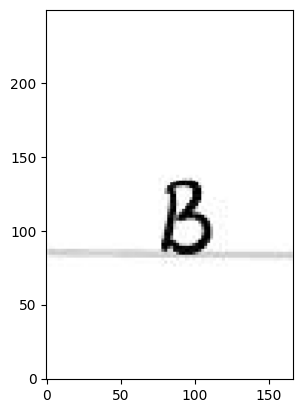

In [92]:
# Path to the JPG image
image_path = "C:\\Users\\tvogt\\OneDrive\\Dokumente\\FH_Dortmund\\Master-Studienarbeit\\BuchstabenInput\\B.png"

# Load the image
image_cv = cv2.imread(image_path)

# Flip the image vertically
flipped_image = np.flipud(image_cv)

# Display the image in jupyter notebook
plt.imshow(flipped_image)
plt.gca().invert_yaxis()
plt.show()

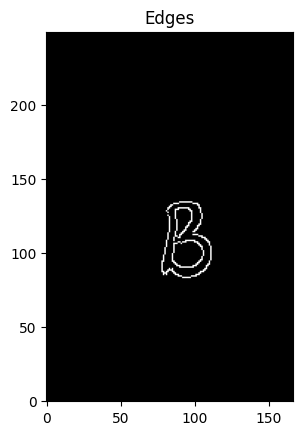

In [93]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(flipped_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, 50, 150)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.gca().invert_yaxis()
plt.show()


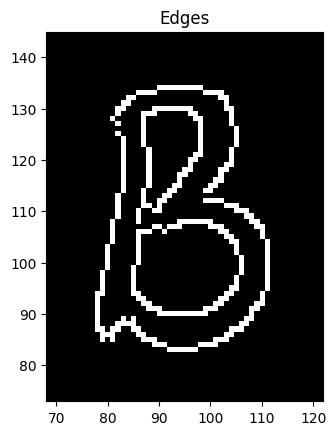

In [94]:
# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box of all contours
x, y, w, h = cv2.boundingRect(np.concatenate(contours))

# Add extra padding to the bounding box
padding = 10  # Adjust the padding value as needed
x -= padding
y -= padding
w += 2 * padding
h += 2 * padding

# Ensure the bounding box coordinates are within the image boundaries
x = max(0, x)
y = max(0, y)
w = min(w, image_cv.shape[1] - x)
h = min(h, image_cv.shape[0] - y)

# Crop the image based on the bounding box
cropped_image = edges[y:y+h, x:x+w]

# Display the edges image with extra padding
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.xlim(x, x + w)
plt.ylim(y + h, y)
plt.gca().invert_yaxis()
plt.show()


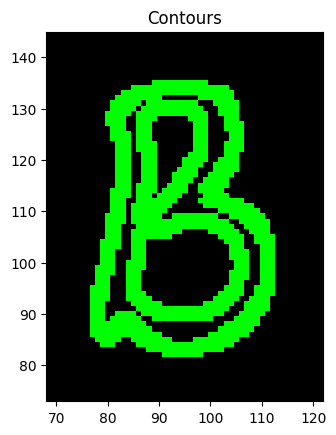

In [95]:
# Find contours in the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image of the same size as the original image
image_contours = np.zeros_like(image_cv)

# Draw contours on the image
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.xlim(x, x + w)
plt.ylim(y + h, y)
plt.gca().invert_yaxis()
plt.show()


In [96]:
# Iterate over the contours and print the coordinates
for contour in contours:
    for point in contour:
        x, y = point[0]
        print(f"X: {x}, Y: {y}")

X: 99, Y: 114
X: 102, Y: 117
X: 102, Y: 118
X: 104, Y: 120
X: 104, Y: 122
X: 105, Y: 123
X: 105, Y: 126
X: 104, Y: 127
X: 104, Y: 129
X: 103, Y: 130
X: 103, Y: 131
X: 101, Y: 133
X: 99, Y: 133
X: 98, Y: 134
X: 90, Y: 134
X: 89, Y: 133
X: 86, Y: 133
X: 81, Y: 128
X: 82, Y: 127
X: 81, Y: 128
X: 82, Y: 129
X: 82, Y: 130
X: 84, Y: 132
X: 85, Y: 132
X: 86, Y: 133
X: 89, Y: 133
X: 90, Y: 134
X: 98, Y: 134
X: 99, Y: 133
X: 102, Y: 133
X: 103, Y: 132
X: 103, Y: 131
X: 104, Y: 130
X: 104, Y: 127
X: 105, Y: 126
X: 105, Y: 123
X: 104, Y: 122
X: 104, Y: 119
X: 102, Y: 117
X: 102, Y: 116
X: 100, Y: 114
X: 86, Y: 108
X: 86, Y: 110
X: 87, Y: 111
X: 87, Y: 114
X: 88, Y: 115
X: 88, Y: 122
X: 87, Y: 123
X: 87, Y: 129
X: 88, Y: 129
X: 89, Y: 130
X: 96, Y: 130
X: 98, Y: 128
X: 98, Y: 121
X: 96, Y: 119
X: 96, Y: 118
X: 94, Y: 116
X: 94, Y: 115
X: 90, Y: 111
X: 90, Y: 110
X: 89, Y: 110
X: 88, Y: 111
X: 87, Y: 111
X: 86, Y: 110
X: 90, Y: 90
X: 89, Y: 91
X: 88, Y: 91
X: 85, Y: 94
X: 85, Y: 99
X: 86, Y: 100
X:

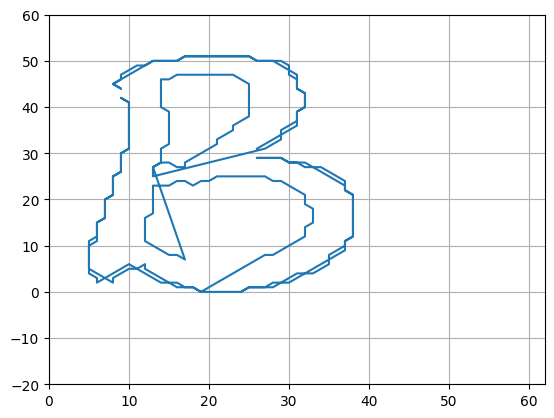

In [97]:
adjusted_coordinates = []
min_x = float('inf')
min_y = float('inf')

# Find den rechtesten Punkt und den untersten Punkt
for contour in contours:
    for point in contour:
        x, y = point[0]
        if x < min_x:
            min_x = x
        if y < min_y:
            min_y = y

# Verschiebe und spiegle die Koordinatenpunkte entsprechend
for contour in contours:
    for point in contour:
        x, y = point[0]
        adjusted_x = 5 + (x - min_x)
        adjusted_y = y - min_y
        adjusted_coordinates.append((adjusted_x, adjusted_y))


# Plot the adjusted coordinates
x_coords, y_coords = zip(*adjusted_coordinates)
plt.plot(x_coords, y_coords)
plt.ylim(-20, 60)
plt.xlim(0, 62)
plt.grid(True)
plt.show()

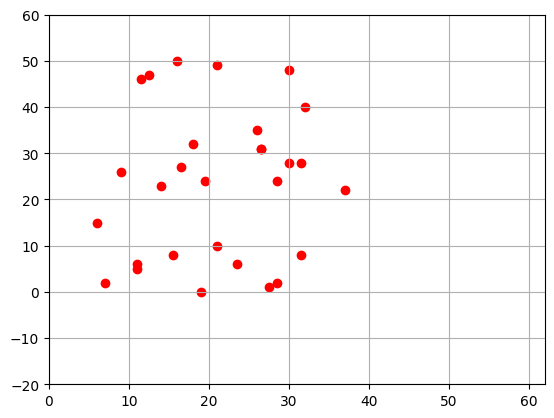

In [125]:
# Iterate over the adjusted coordinates
new_coordinates = []
visited = set()  # Keep track of visited coordinates
for i in range(len(adjusted_coordinates)):
    curr_x, curr_y = adjusted_coordinates[i]
    if (curr_x, curr_y) in visited:
        continue  # Skip already visited coordinates
    min_distance = float('inf')
    next_point = None
    
    # Find the point with the minimum distance and the same y-coordinate
    for j in range(len(adjusted_coordinates)):
        if i != j:
            x, y = adjusted_coordinates[j]
            if y == curr_y:
                distance = np.sqrt((x - curr_x)**2 + (y - curr_y)**2)
                if distance < min_distance:
                    min_distance = distance
                    next_point = (x, y)
    
    # Calculate the midpoint between the current point and the next point
    if next_point is not None and i % 5 == 0:  # Add every 5th y-coordinate
        mid_x = (curr_x + next_point[0]) / 2
        mid_y = (curr_y + next_point[1]) / 2
        new_coordinates.append((mid_x, mid_y))
        
    visited.add((curr_x, curr_y))  # Mark current coordinate as visited

# Extract the x and y coordinates of the new points
new_x_coords, new_y_coords = zip(*new_coordinates)

# Plot the new points
plt.scatter(new_x_coords, new_y_coords, color='red')
plt.ylim(-20, 60)
plt.xlim(0, 62)
plt.grid(True)
plt.show()
